In [7]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\victo\AppData\Local\Temp\ipykernel_17496\2536917552.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#MYSQL Connection

try:
    connection = mysql.connector.connect(
    host = 'localhost',
    port = 3306,
    user = 'root',
    database = 'jumia',
    password = 'qwerty'
)
except Exception as e:
    print(e)
else:
    print('Connection succesful')

Connection succesful


In [5]:
#Querying the database
sql_query = "SELECT * FROM phones"

In [8]:
phone_df = pd.read_sql(sql_query, connection)

C:\Users\victo\AppData\Local\Temp\ipykernel_17496\3343132134.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  phone_df = pd.read_sql(sql_query, connection)


In [9]:
phone_df.head()

,name,price,rating,rating_count
0,"Infinix Smart 7 HD, 6.6"", 2GB RAM, 64GB, 5000m...",12699.0,4.4,220
1,"Freeyond F9,4GB+64GB,6.52"" 4G Smartphone,13.0M...",11876.0,4.5,62
2,"Infinix Smart 7 HD, 6.6"", 2GB RAM, 64GB, 5000m...",12699.0,4.4,13
3,"Infinix Smart 7 HD, 6.6"", 2GB RAM, 64GB, 5000m...",12699.0,4.0,4
4,"UMIDIGI A11S 4GB,32GB 5150mAh (16MP+8MP+5MP)+8...",10800.0,4.0,1


In [13]:
phone_df.groupby('rating')['price'].mean()

rating
0.0    13119.277778
1.0    13499.333333
2.0    12494.500000
2.6    12799.000000
3.0    13699.000000
3.5    12550.000000
3.7    13229.500000
3.8    12447.000000
3.9    13849.000000
4.0    12870.733333
4.1    14565.666667
4.2    12925.000000
4.3    13049.400000
4.4    13097.600000
4.5    13086.090909
4.6    13224.000000
4.7    12874.333333
4.8    12955.333333
5.0    13479.000000
Name: price, dtype: float64

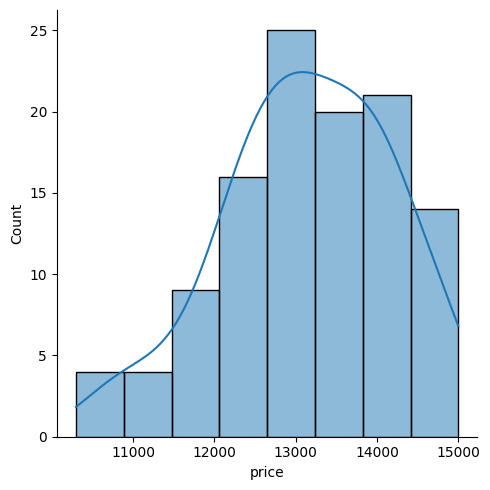

In [16]:
sns.displot(phone_df, x= 'price', kde = True)